# Prediksi Gerhana Matahari Cincin 2019 Indonesia

In [2]:
import numpy as np

import pytz
import datetime

from astropy import units as u
from astropy.time import Time
from astropy.coordinates import EarthLocation, AltAz, get_sun, get_moon

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

# Siak, RIAU

Misalkan akan melakukan pengamatan di Siak, Riau. Dari kabar burung, gerhana akan terjadi pada tanggal 26 Desember 2019 pukul 12:10 WIB

In [4]:
a=np.linspace(90, 120, 100)
b=np.linspace(1, 10, 100)
A,B = np.meshgrid(a,b)
EarthLocation.from_geodetic(A*u.deg, B*u.deg).shape

(100, 100)

In [5]:
EarthLocation.of_address('istana siak')

<EarthLocation (-1516098.55969166, 6193212.94917664, 161291.00298546) m>

In [3]:
siak = EarthLocation.of_address('istana siak')
#bosscha = EarthLocation.from_geodetic(102.2465*u.deg, 1.0089*u.deg)
tz = pytz.timezone('Asia/Jakarta')
guess_time = Time(tz.localize(datetime.datetime(2019,12, 26, 12, 10, 0)))

Buat objek bulan dan matahari untuk lokasi dan waktu di atas

In [4]:
aaframe = AltAz(obstime=guess_time, location=siak)

sunaa = get_sun(guess_time).transform_to(aaframe)
moonaa = get_moon(guess_time).transform_to(aaframe)

sep = sunaa.separation(moonaa).to(u.arcmin)
sep

<Angle 3.86183832 arcmin>

Hitung ukuran diameter sudut Matahari dan Bulan. Di dalam paket astropy sudah ada radius Matahari, kita harus tetap menghitung ukuran diameter sudut bulan. Di laman   [Wikipedia](https://en.wikipedia.org/wiki/Moon) kita bisa menghitung radius rata-rata.

In [5]:
from astropy import constants

R_sun = constants.R_sun
R_moon = 1737.1 * u.km

def apparent_size(R, distance):
    return (R/distance).to(u.arcmin, u.dimensionless_angles())

In [6]:
sunsize = apparent_size(R_sun, sunaa.distance)
sunsize

<Quantity 16.25611397 arcmin>

In [7]:
moonsize = apparent_size(R_moon, moonaa.distance)
moonsize

<Quantity 15.78046117 arcmin>

Plot posisi bulan dan matahari untuk lokasi dan waktu di atas

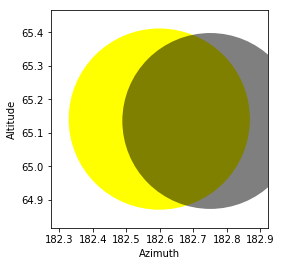

In [8]:
sun_circle = plt.Circle((sunaa.az.deg, sunaa.alt.deg), 
                        sunsize.to(u.deg).value,
                        fc='yellow')
moon_circle = plt.Circle((moonaa.az.deg, moonaa.alt.deg), 
                         moonsize.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(sun_circle)
ax.add_patch(moon_circle)
biggest = max(sep.deg, sunsize.to(u.deg).value, moonsize.to(u.deg).value)
plt.xlim(sunaa.az.deg-biggest*1.2, sunaa.az.deg+biggest*1.2)
plt.ylim(sunaa.alt.deg-biggest*1.2, sunaa.alt.deg+biggest*1.2)

plt.xlabel('Azimuth')
plt.ylabel('Altitude');

Plot di atas menunjukkan terjadinya gerhana sebagian. Sepertinya kabar burung yang sampai kurang akurat. Mari kita menghitung jarak sudut antara Matahari dan Bulan di sekitar waktu yang kita dengar

In [9]:
def sunmoon(time, location):
    aaframe = AltAz(obstime=time, location=location)
    sunaa = get_sun(time).transform_to(aaframe)
    moonaa = get_moon(time).transform_to(aaframe)
    
    return sunaa.separation(moonaa), sunaa, moonaa

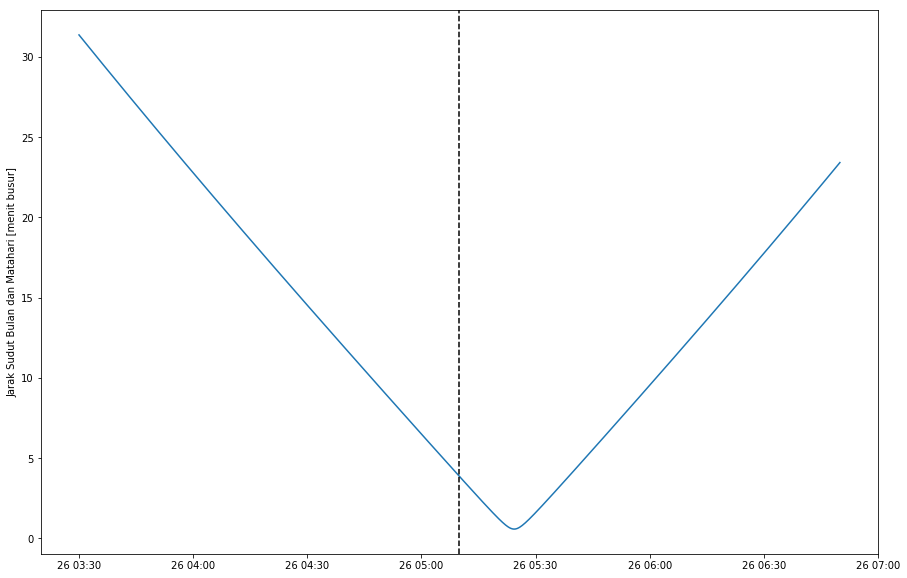

In [10]:
time_range = guess_time + np.linspace(-100, 100, 1000)*u.min

sep, sunaa, moonaa = sunmoon(time_range, siak)

plt.figure(figsize=(15, 10))
plt.plot_date(time_range.plot_date, sep.arcmin, fmt='-')
plt.axvline(guess_time.plot_date, c='k', ls='--')
plt.ylabel('Jarak Sudut Bulan dan Matahari [menit busur]');

Dari grafik di atas perkiraan waktu dari kabar burung bergeser sekitar 15 menit. Kita dapat mencari minimum dari grafik di atas untuk menentukan puncak gerhana

In [11]:
maxeclipse = time_range[np.argmin(sunaa.separation(moonaa).arcmin)]
maxeclipse

<Time object: scale='utc' format='datetime' value=2019-12-26 05:24:18.858859>

Mari kita plot lagi posisi Bulan dan Mathari dengan waktu puncak gerhana

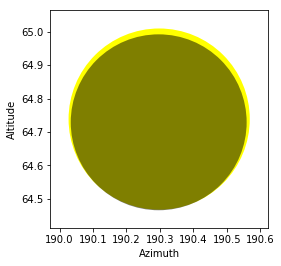

In [12]:
sep, sunaa, moonaa = sunmoon(maxeclipse, siak)

sun_circle = plt.Circle((sunaa.az.deg, sunaa.alt.deg), 
                        sunsize.to(u.deg).value,
                        fc='yellow')
moon_circle = plt.Circle((moonaa.az.deg, moonaa.alt.deg), 
                         moonsize.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(sun_circle)
ax.add_patch(moon_circle)
biggest = max(sep.deg, sunsize.to(u.deg).value, moonsize.to(u.deg).value)
plt.xlim(sunaa.az.deg-biggest*1.2, sunaa.az.deg+biggest*1.2)
plt.ylim(sunaa.alt.deg-biggest*1.2, sunaa.alt.deg+biggest*1.2)

plt.xlabel('Azimuth')
plt.ylabel('Altitude');

Yay!!!!!! Ternyata di daerah tersebut memang terjadi gerhana matahari cincin

# Pulau Penyengat

Kata Bu Wiwin, ada pulau yang sudah disurvey dan akan dilewati puncak gerhana

In [13]:
penyengat  = EarthLocation.of_address('pulau penyengat')

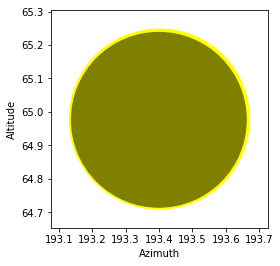

In [14]:
penyengat  = EarthLocation.of_address('pulau penyengat')
time_range = guess_time + np.linspace(-100, 100, 1000)*u.min
sep, sunaa, moonaa = sunmoon(time_range, penyengat)

maxeclipse = time_range[np.argmin(sunaa.separation(moonaa).arcmin)]
sep, sunaa, moonaa = sunmoon(maxeclipse, penyengat)

sun_circle = plt.Circle((sunaa.az.deg, sunaa.alt.deg), 
                        sunsize.to(u.deg).value,
                        fc='yellow')
moon_circle = plt.Circle((moonaa.az.deg, moonaa.alt.deg), 
                         moonsize.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(sun_circle)
ax.add_patch(moon_circle)
biggest = max(sep.deg, sunsize.to(u.deg).value, moonsize.to(u.deg).value)
plt.xlim(sunaa.az.deg-biggest*1.2, sunaa.az.deg+biggest*1.2)
plt.ylim(sunaa.alt.deg-biggest*1.2, sunaa.alt.deg+biggest*1.2)

plt.xlabel('Azimuth')
plt.ylabel('Altitude');

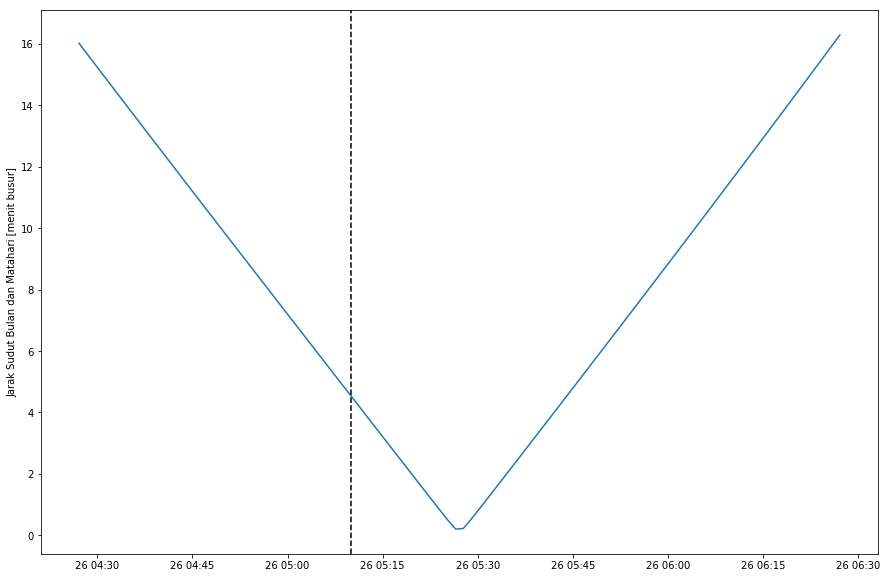

In [15]:
time_range = maxeclipse + np.linspace(-60, 60, 100)*u.min

sep, sunaa, moonaa = sunmoon(time_range, penyengat)

plt.figure(figsize=(15, 10))
plt.plot_date(time_range.plot_date, sep.arcmin, fmt='-')
plt.axvline(guess_time.plot_date, c='k', ls='--')
plt.ylabel('Jarak Sudut Bulan dan Matahari [menit busur]');

Mari kita mencari waktu puncak gerhana

In [16]:
time_range[np.argmin(sunaa.separation(moonaa).arcmin)]

<Time object: scale='utc' format='datetime' value=2019-12-26 05:26:30.663391>

In [17]:
next_guess = time_range[np.argmin(sep)]
time_range = next_guess + np.linspace(-5, 5, 500)*u.min

sep, sunaa, moonaa = sunmoon(time_range, penyengat)

Mari mencari awal dan akhir peristiwa gerhana matahari cincin

(0, 1.1910359520752887)

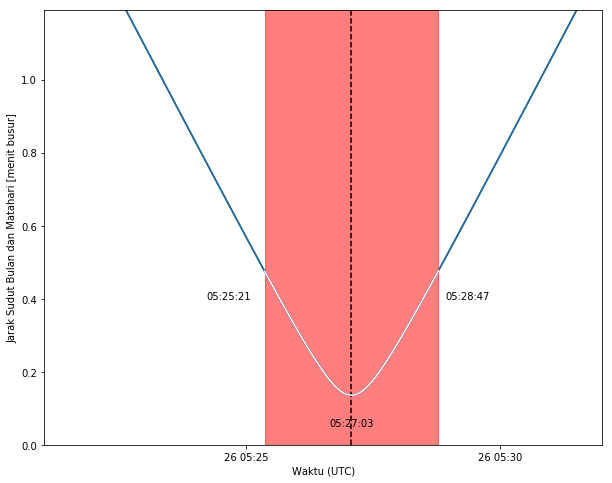

In [18]:
maxeclipse = time_range[np.argmin(sunaa.separation(moonaa).arcmin)]
moonsize = apparent_size(R_moon, moonaa.distance)
sunsize = apparent_size(R_sun, sunaa.distance)

annular = sep < (sunsize - moonsize)
partial = sep < (moonsize + sunsize)

plt.figure(figsize=(10, 8))
plt.axvline(time_range[np.argmin(sunaa.separation(moonaa).arcmin)].plot_date, c='k', ls='--')
plt.axvspan(time_range.plot_date[annular].min(), time_range.plot_date[annular].max(), color='red', alpha=0.3)
plt.plot_date(time_range.plot_date, sep.arcmin, fmt='-', c='k')
plt.plot_date(time_range.plot_date[partial], sep.arcmin[partial], fmt='-')
plt.plot_date(time_range.plot_date[annular], sep.arcmin[annular], fmt='-', color='white')
plt.text(time_range.plot_date[annular].min()-0.0008, 0.4, np.min(time_range[annular]).strftime('%H:%M:%S'))
plt.text(time_range.plot_date[annular].max()+0.0001, 0.4, np.max(time_range[annular]).strftime('%H:%M:%S'))
plt.text(time_range[np.argmin(sunaa.separation(moonaa).arcmin)].plot_date-0.0003, 0.05, time_range[np.argmin(sunaa.separation(moonaa).arcmin)].strftime('%H:%M:%S'))
plt.ylabel('Jarak Sudut Bulan dan Matahari [menit busur]')
plt.xlabel('Waktu (UTC)')
plt.ylim(0, sep.arcmin[-1])

In [19]:
np.min(time_range[annular])

<Time object: scale='utc' format='datetime' value=2019-12-26 05:25:21.525114>

Perkiraan durasi gerhana matahari cincin

In [20]:
(np.max(time_range[annular])-np.min(time_range[annular])).to(u.min)

<Quantity 3.42685371 min>

# Observatorium Bosscha, Lembang

Bagaimana dengan Observatorium Bosscha di Lembang?

In [21]:
bosscha = EarthLocation.of_address('Bosscha Observatory')
tz = pytz.timezone('Asia/Jakarta')

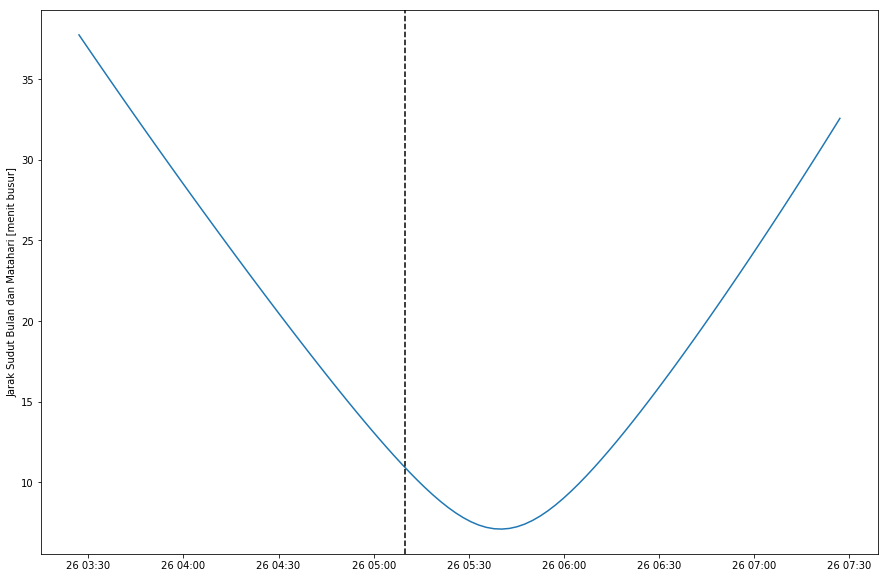

In [22]:
time_range = maxeclipse + np.linspace(-120, 120, 100)*u.min

sep, sunaa, moonaa = sunmoon(time_range, bosscha)

plt.figure(figsize=(15, 10))
plt.plot_date(time_range.plot_date, sep.arcmin, fmt='-')
plt.axvline(guess_time.plot_date, c='k', ls='--')
plt.ylabel('Jarak Sudut Bulan dan Matahari [menit busur]');

Apakah akan terjadi gerhana matahari cincin di waktu puncak gerhana di Observatorium Bosscha

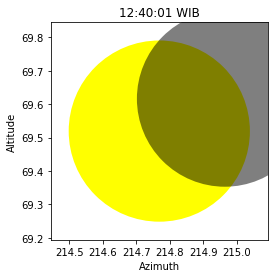

In [23]:
next_guess = time_range[np.argmin(sep)]
time_range = next_guess + np.linspace(-5, 5, 500)*u.min
sep = sunmoon(time_range, bosscha)[0]
maxeclipse = time_range[np.argmin(sep)]

sep, sunaa, moonaa = sunmoon(maxeclipse, bosscha)

sunsize = apparent_size(R_sun, sunaa.distance)
moonsize = apparent_size(R_moon, moonaa.distance)

sun_circle = plt.Circle((sunaa.az.deg, sunaa.alt.deg), 
                        sunsize.to(u.deg).value,
                        fc='yellow')
moon_circle = plt.Circle((moonaa.az.deg, moonaa.alt.deg), 
                         moonsize.to(u.deg).value,
                         fc='black', alpha=.5)

ax = plt.subplot(aspect=1)
ax.add_patch(sun_circle)
ax.add_patch(moon_circle)
biggest = max(sep.deg, sunsize.to(u.deg).value, moonsize.to(u.deg).value)
plt.xlim(sunaa.az.deg-biggest*1.2, sunaa.az.deg+biggest*1.2)
plt.ylim(sunaa.alt.deg-biggest*1.2, sunaa.alt.deg+biggest*1.2)

maxdt = pytz.utc.localize(maxeclipse.datetime).astimezone(tz)

plt.xlabel('Azimuth')
plt.ylabel('Altitude')
plt.title('{0:%H}:{0:%M}:{0:%S} {1}'.format(maxdt, maxdt.tzinfo.tzname(maxdt)));

Di Observatorium Bosscha banyak pohon. Apakah ketika gerhana sebagian dimulai medan pandang kita tidak terhalang pohon? Asumsi tinggi rata-rata pohon 30 meter.

In [24]:
30*u.m/np.tan(sunaa.alt)

<Quantity 11.2048944 m>

Selama pengamat berjarak 12 meter dari pohon pandangan akan bebas. Aman